<a href="https://colab.research.google.com/github/tojewel/Aspect-Based-Sentiment-Analysis/blob/master/0_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot
!pip3 install ann_visualizer
!pip install graphviz

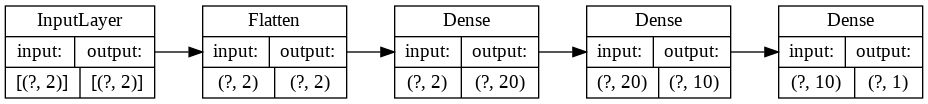

In [ ]:
# --- Creates a simple Nural Network model in Keras library ---
 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model, model_to_dot

from livelossplot import PlotLossesKeras
from ann_visualizer.visualize import ann_viz
 
def make_model(layers=[2, 20, 10, 1]):    
 
  model = Sequential([
      Flatten(input_shape=(layers[0],)),
      *[Dense(l, activation="relu") for l in layers[1:-1]],
      Dense(layers[-1])
  ])
 
  model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
 
  return model
 
model = make_model()

plot_model(model, show_layer_names=False, rankdir="LR", show_shapes=True)
# model.summary()

In [ ]:
# --- Generates data for the model to train and test ---
 
import numpy as np 
from random import random, shuffle
 
features = {
    .1: lambda x, y: x + y,
    .2: lambda x, y: x - y,
    .3: lambda x, y: x * y,
    .4: lambda x, y: 2*x + y,
}
 
def random_sample(f, l):
  x, y = random(), random()
  return [f, x, y, l(x, y)]
 
def random_data(sample_size = 1):
  return [random_sample(f, l) 
          for f, l in features.items()
          for _ in range(sample_size)]
 
def split(data):
  return np.array([d[:3] for d in data]), np.array([d[3:] for d in data])
 
for d in random_data():
  print(d)

[0.1, 0.09329315543395122, 0.26294369644350235, 0.3562368518774536]
[0.2, 0.2383349578419871, 0.23146166145022617, 0.00687329639176093]
[0.3, 0.2459744252007422, 0.5949992646564772, 0.14635460211874127]
[0.4, 0.6586218287303605, 0.5705386187945574, 1.8877822762552783]


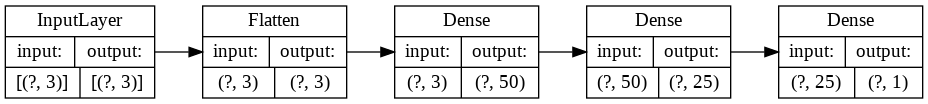

In [ ]:
train_data = random_data(10000)
model = make_model([3, 50, 25, 1])
plot_model(model, rankdir="LR", show_layer_names=False, show_shapes=True)

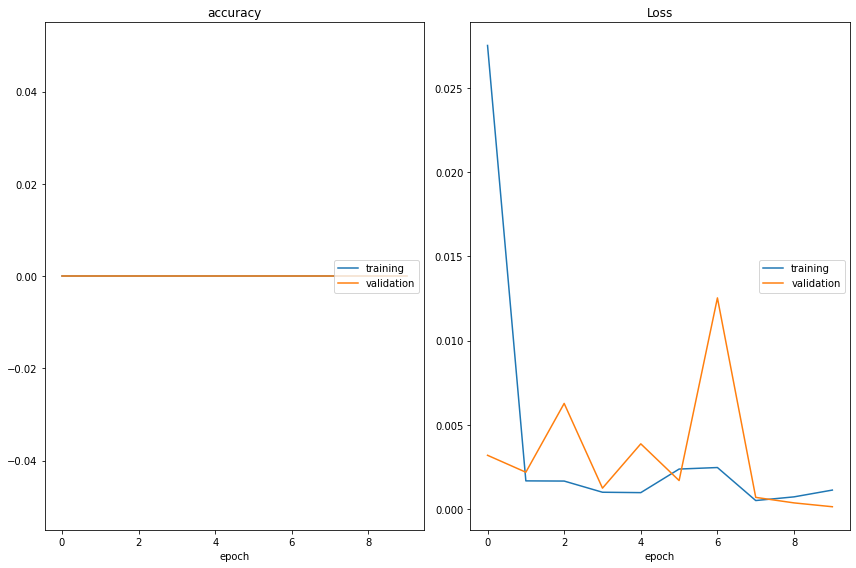

accuracy
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.001, max:    0.028, cur:    0.001)
	validation       	 (min:    0.000, max:    0.013, cur:    0.000)
3200/3200 [==============================] - 8s 3ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 1.4638e-04 - val_accuracy: 0.0000e+00


In [ ]:
model.fit(*split(train_data), epochs=10, batch_size=10, validation_split=.2, shuffle=True, callbacks=[PlotLossesKeras()])

In [ ]:
test_data = random_data()
model_prediction = model.predict(split(test_data)[0])
for td, mp in zip(test_data, model_prediction):
  print(td, "~", mp)

[0.1, 0.3847889564370577, 0.6026053730760491, 0.9873943295131068] ~ [0.98746514]
[0.2, 0.4699656846877056, 0.03911129592251994, 0.43085438876518567] ~ [0.43139577]
[0.3, 0.5093536587079613, 0.37907615772361136, 0.19308382786547768] ~ [0.19919848]
[0.4, 0.23255320345794672, 0.8127035810026516, 1.2778099879185452] ~ [1.2694156]
